In [115]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_moons

In [116]:
# create random datasets
x_rnd, y_rnd = make_moons(n_samples=200, noise=0.1, random_state=42)
X = torch.tensor(x_rnd, dtype=torch.float32)
y = torch.tensor(y_rnd, dtype=torch.long)

In [117]:
# create nn class
class FeedForwardNN(nn.Module):
    def __init__(self, input_f, hidden_f, output_f):
        super(FeedForwardNN, self).__init__()
        self.fc1 = nn.Linear(input_f, hidden_f)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_f, output_f)
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

In [118]:
# define nn and its hyperparameters
nn_model = FeedForwardNN(2, 8, 2)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(nn_model.parameters(), lr=0.01, weight_decay=1e-5)

50/1000, loss: 0.2513
100/1000, loss: 0.1577
150/1000, loss: 0.0650
200/1000, loss: 0.0331
250/1000, loss: 0.0207
300/1000, loss: 0.0144
350/1000, loss: 0.0106
400/1000, loss: 0.0082
450/1000, loss: 0.0065
500/1000, loss: 0.0054
550/1000, loss: 0.0045
600/1000, loss: 0.0039
650/1000, loss: 0.0034
700/1000, loss: 0.0030
750/1000, loss: 0.0026
800/1000, loss: 0.0023
850/1000, loss: 0.0021
900/1000, loss: 0.0019
950/1000, loss: 0.0017
1000/1000, loss: 0.0016


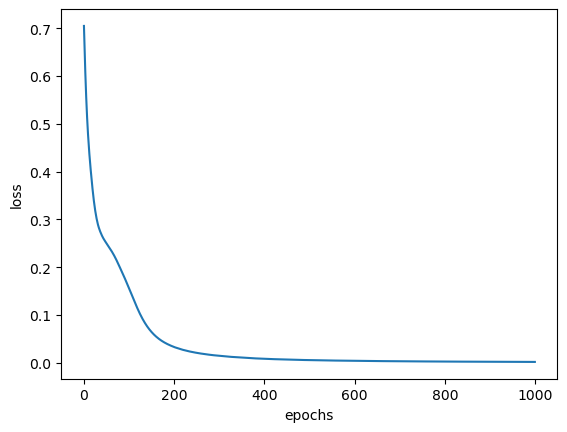

In [119]:
# training set
epochs = 1000
losses = []
for epoch in range(epochs):
    y_pred = nn_model(X)
    loss = criterion(y_pred, y)
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (epoch+1) % 50 == 0:
        print(f"{epoch+1}/{epochs}, loss: {loss.item():.4f}")
plt.plot(losses)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

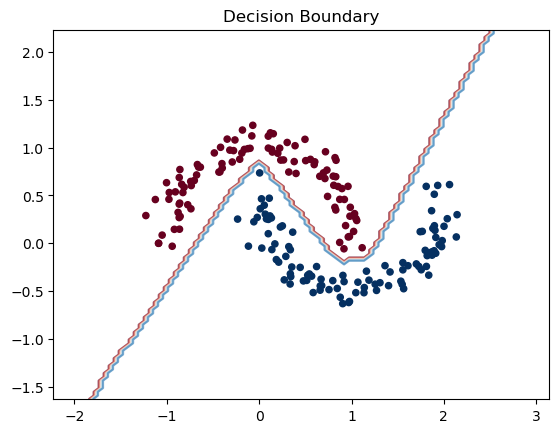

In [120]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 100),
    np.linspace(y_min, y_max, 100),
)
grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)
preds = nn_model(grid).detach().numpy()
preds = np.argmax(preds, axis=1)

plt.contour(xx, yy, preds.reshape(xx.shape), cmap="RdBu", alpha=0.6)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="RdBu", s=20)
plt.title("Decision Boundary")
plt.show()